## Logistic Regression

This tutorial is based on the following resources:
* Introduction to Logistic Regression: https://medium.com/@anishsingh20/logistic-regression-in-python-423c8d32838b
* Data Visualization with Seaborn: https://www.datacamp.com/courses/data-visualization-with-seaborn?tap_a=5644-dce66f&tap_s=210732-9d6bbf
* Data Cleaning in Python: https://www.datacamp.com/courses/cleaning-data-in-python?tap_a=5644-dce66f&tap_s=210732-9d6bbf

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [453]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [454]:
train.shape

(891, 12)

## Data Dictionary

1. PassengerID - type should be integers
2. Survived - survived or not
3. Pclass - class of Travel of every passenger
4. Name - the name of the passenger
5. Sex - gender
6. Age - age of passengers
7. SibSp - No. of siblings/spouse aboard
8. Parch - No. of parent/child aboard
9. Ticket - Ticket number
10. Fare - what Prices they paid
11. Cabin - cabin number
12. Embarked - the port in which a passenger has embarked. (C - Cherbourg , S -Southhampton , Q -Queenstown)

In [456]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## Missing data

In [458]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

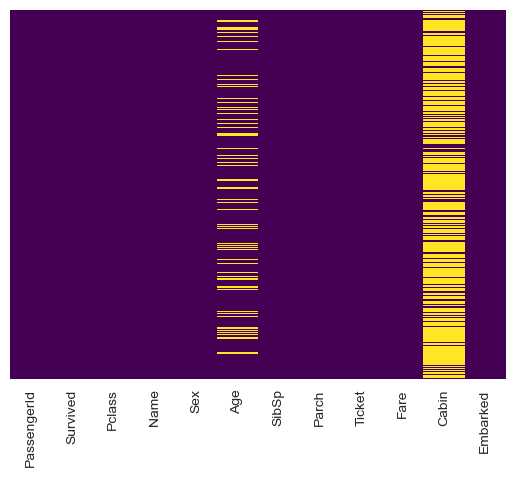

In [459]:
# We can use seaborn to create a simple heatmap to see where we are missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* Roughly 20 percent of the Age data is missing. 
* The proportion of Age missing is likely small enough for reasonable replacement with imputation. 
* The Cabin column is just missing too much data. We can drop the column, or change it to another feature such as **"Cabin Known: 1 or 0"**

<Axes: xlabel='Survived', ylabel='count'>

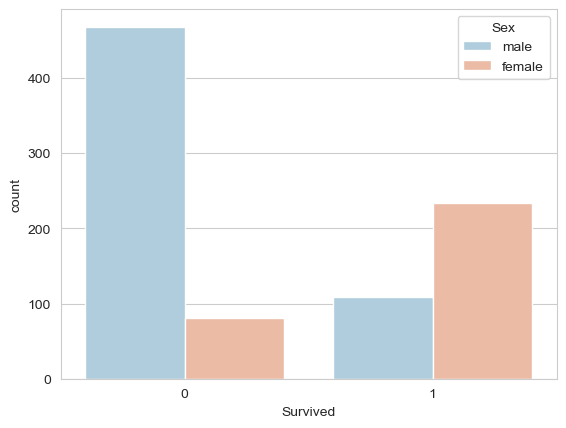

In [461]:
#count-plot of people survided 
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

* People who did not survive were much more likely to be male 
* People who did survive were almost twice as likely to be female

<Axes: xlabel='Survived', ylabel='count'>

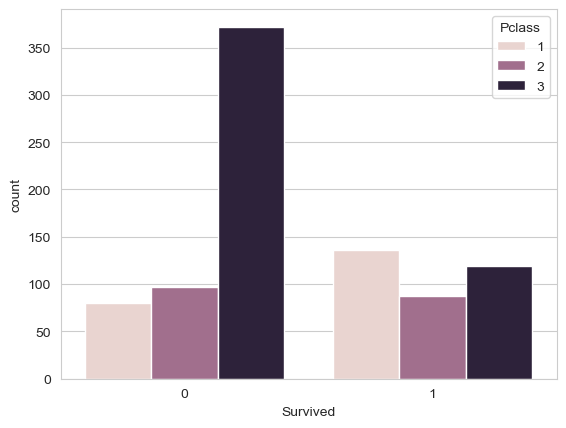

In [463]:
#no. of people who survived according to their Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

* People who did not survive were more likely to be belonging to third class i.e the lowest class
* People who did survive were more likely to belong to higher classes

/var/folders/6d/xqywj2xx2llc_k2t6nkshrgh0000gn/T/ipykernel_77979/3642634131.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(), kde=True, bins=30, color='Green')


<Axes: xlabel='Age', ylabel='Density'>

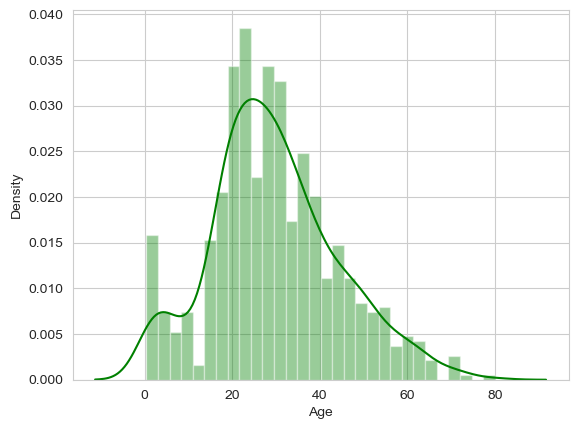

In [465]:
#distribution plot of age of the people
sns.distplot(train['Age'].dropna(), kde=True, bins=30, color='Green')

* The average age group of people to survive is somewhere between 20 to 30
* The older you get the less are chances of your survival

<Axes: xlabel='SibSp', ylabel='count'>

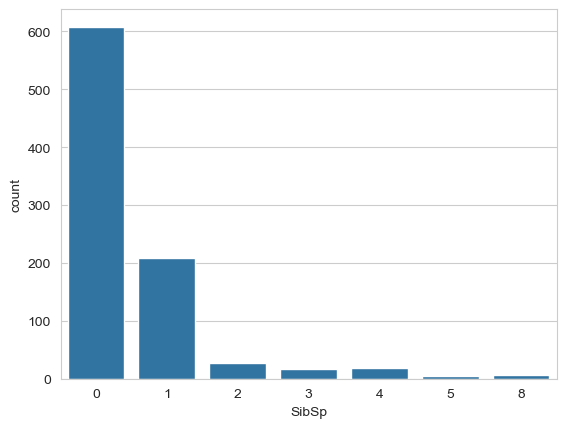

In [467]:
#countplot of the people having siblings or spouce
sns.countplot(x='SibSp',data=train)

* Most of the people on board are single (option 0) 
* The second most likely group is people with spouses (option 1)


<Axes: >

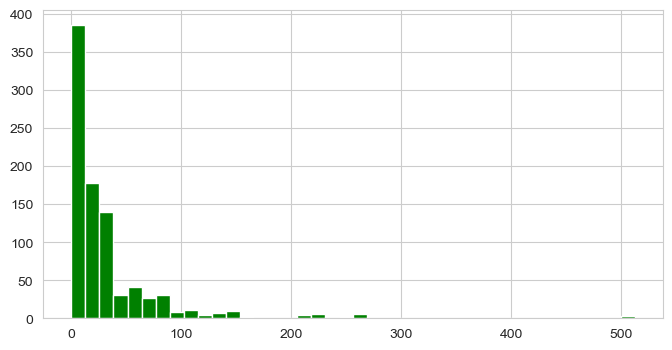

In [469]:
#distribution plot of the ticket fare
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

* Most of the purchase prices are between 0 and 50 
* Tickets are more distributed towards cheaper fare prices (most passengers are in cheaper third class)

## Data Cleaning

/var/folders/6d/xqywj2xx2llc_k2t6nkshrgh0000gn/T/ipykernel_77979/3233273643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

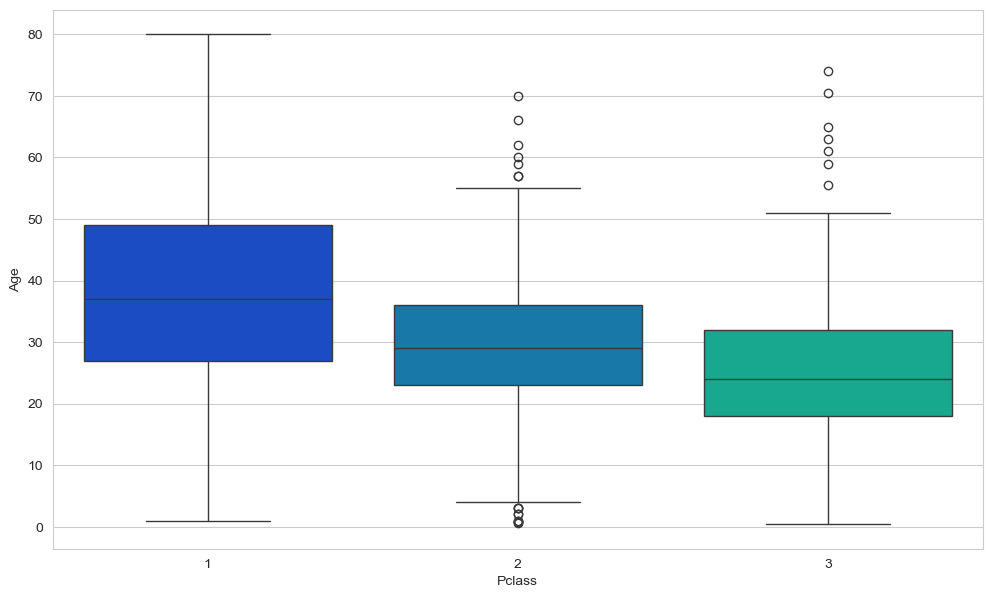

In [472]:
#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

* The wealthier passengers in the higher classes tend to be older
* We’ll use the average age values to impute based on Pclass for Age

In [474]:
def impute_age(cols):
    age = cols[0]
    p_class = cols[1]
    
    if pd.isnull(age):
        if p_class == 1:
            return 37
        elif p_class == 2:
            return 29
        else:
            return 24
    else:
        return age # Return age without making any changes

/var/folders/6d/xqywj2xx2llc_k2t6nkshrgh0000gn/T/ipykernel_77979/1171612641.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
/var/folders/6d/xqywj2xx2llc_k2t6nkshrgh0000gn/T/ipykernel_77979/1171612641.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_class = cols[1]


<Axes: >

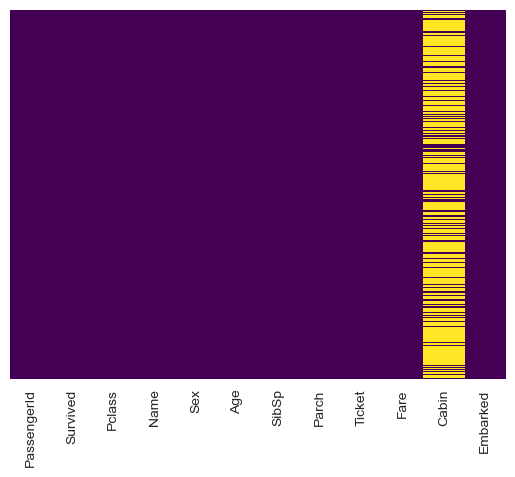

In [475]:
# Apply the impute_age function to the training dataset
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

# Check the heatmap again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [476]:
# Drop the Cabin column and the row in Embarked that is NaN.
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [492]:
# Convert categorical features to dummy variables
sex = pd.get_dummies(train['Sex'],prefix='gender')
#embark = pd.get_dummies(train['Embarked'],drop_first=True)

#drop the sex,embarked,name and tickets columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

#concatenate new sex and embark column to our train dataframe
train = pd.concat([train,sex],axis=1)

#check the head of dataframe
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender_female,gender_male
0,1,0,3,22.0,1,0,7.2500,False,True
1,2,1,1,38.0,1,0,71.2833,True,False
2,3,1,3,26.0,0,0,7.9250,True,False
3,4,1,1,35.0,1,0,53.1000,True,False
4,5,0,3,35.0,0,0,8.0500,False,True


In [494]:
# Predictors
X = train[['Pclass', 'Age', 'gender_female', 'gender_male']]
# Response
y = train[['Survived']]

In [496]:
X.head()

,Pclass,Age,gender_female,gender_male
0,3,22.0,False,True
1,1,38.0,True,False
2,3,26.0,True,False
3,1,35.0,True,False
4,3,35.0,False,True


In [498]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [500]:
# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [502]:
# Let's make a few predictions
predictions = logmodel.predict(X_test)

In [504]:
predictions

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0])

### Model Evaluation
* Check precision, recall, f1-score using classification report
* Check how accurate is our model for predictions

In [507]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.79      0.79      0.79        73

    accuracy                           0.83       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.83      0.83      0.83       178



### The confusion matrix

In [510]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[90 15]
 [15 58]]


* True positive: 79 (We predicted a positive result and it was positive)
* True negative: 144 (We predicted a negative result and it was negative)
* False positive: 22 (We predicted a positive result and it was negative)
* False negative: 22 (We predicted a negative result and it was positive)

In [513]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictions)

0.8314606741573034

In [515]:
metrics.roc_auc_score(y_test, predictions)

0.8258317025440314